# Smoothed Moving Average (SMMA)

https://www.metatrader5.com/en/terminal/help/indicators/trend_indicators/ma#smma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
df.shape

(105, 6)

In [4]:
n = 10
SMMA = np.array([np.nan] * len(df['Adj Close']))
SMMA[n - 2] = df['Adj Close'][:n - 1].mean()
for i in range(n - 1, len(df['Adj Close'])):
    SMMA[i] = (SMMA [i - 1] * (n - 2) + 2 * df['Adj Close'][i]) / n

In [5]:
SMMA

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
        205.12649544,  205.72680976,  206.3043024 ,  207.37753612,
        209.0815333 ,  210.02401264,  210.69464351,  211.23313181,
        211.75124245,  212.29869296,  213.08990337,  214.07214849,
        215.50886939,  217.06507892,  218.82602553,  220.37965283,
        221.32685766,  221.33645553,  220.98691642,  220.11787794,
        220.51811215,  220.28659972,  221.16113098,  221.35072478,
        220.31962102,  219.56617962,  218.9892261 ,  218.85709748,
        218.28106058,  218.44138587,  218.84748429,  218.82109963,
        219.69898491,  220.55807413,  221.5469933 ,  222.73900464,
        224.24630011,  224.64244729,  224.22508463,  223.78799931,
        224.05353484,  222.18022108,  220.30252046,  220.32051677,
        219.39225941,  219.60024253,  219.57611683,  218.53080926,
        218.34747761,  218.46673629,  218.97492703,  217.86529

In [6]:
x = SMMA.reshape(-1,1)
data = pd.DataFrame.from_records(x)
data

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,205.126495
9,205.726810


In [7]:
df['SMMA'] = data.values
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,SMMA
Date,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN
2018-08-08,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,NaN
2018-08-09,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,NaN
2018-08-10,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,NaN
2018-08-13,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,205.126495


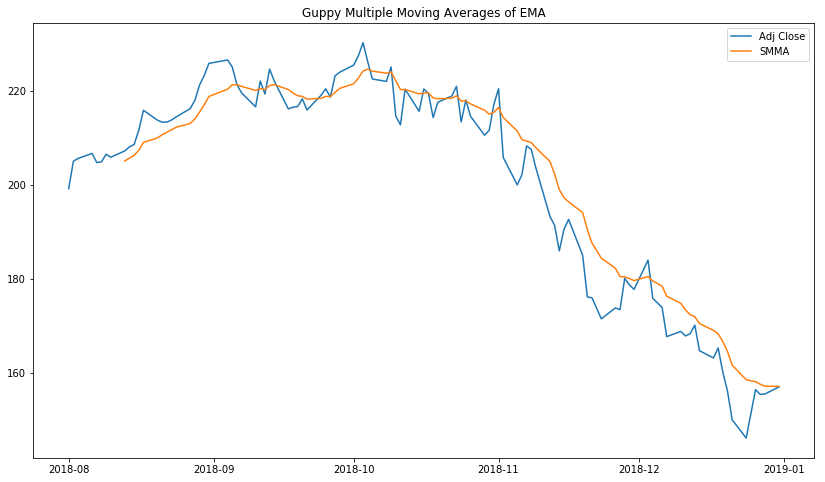

In [8]:
# Line Chart
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['SMMA'])
plt.title('Guppy Multiple Moving Averages of EMA')
plt.legend(loc='best')
plt.show()

## Candlestick with SMMA

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMMA,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN,False


Text(0,0.5,'Price')

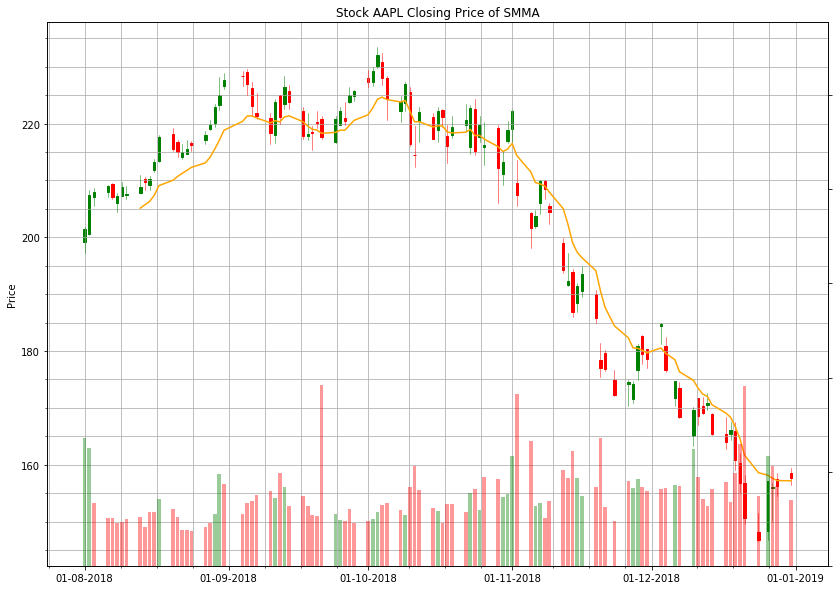

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['SMMA'], color='orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price of SMMA')
ax1.set_ylabel('Price')